This script is for reading log.dat files from the gtos, plotting them and saving them in saved_logs.

The idea is that it reads the files initially in depin_0, and creates a params file to know the inputs when it was made.

Then it just makes a quick evaluation of the data to see how good they are.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from eval_tools import *
import os
%matplotlib inline

In [12]:
plt.rcParams['font.family'] = 'IBM Plex Mono'  # Replace 'YourFontName' with the name of your installed font
plt.rcParams['xtick.labelsize'] = 22  # Fontsize for x-axis ticks
plt.rcParams['ytick.labelsize'] = 22  # Fontsize for y-axis ticks
plt.rcParams['axes.labelsize'] = 25  # Fontsize for x and y axis labels
plt.rcParams['axes.titlesize'] = 35   # Fontsize for plot titles
plt.rcParams['figure.titlesize'] = 24 # Fontsize for figure title (suptitle)
plt.rcParams['legend.fontsize'] = 25

graph_res = (15, 12)

Data structure is as follows:

$t \  m_x \	m_y \ m_z \	h_{ext-x} \	h_{ext-y} \	h_{ext-z} \	E_{ext} \	E_{dem} \	E_{ex}$

what we are mainly interested is the $m_z$


In [13]:
#select the foledr where the PSD_data and PSD_freq files are contained

initialdir = "/home/balthasar/Sync/Master/Thesis/"
path = get_folder_path_str(initialdir)

#folder_path = os.path.join(path, "images")
#os.makedirs(folder_path, exist_ok=True)

f_name = os.path.basename(path) #used later to generate titles for the plots


In [14]:

save_figs = False

In [15]:
folder_path = path

#### PSD

In [16]:
show_peaks = False
psdx, psdy, psdz, freq = np.loadtxt(folder_path+"/vFFT_lin.dat", unpack=True)
#freq = np.loadtxt(folder_path+"/PSD_freq.txt")
fac = 0.05

In [17]:
datamf = stack_peaks(fac, psdx, psdy, psdz)
# Specify the header as a string
head = "x   y   z, index is proper"

# Save the data with header using np.savetxt
np.savetxt(folder_path+"/peaks_fft.txt", datamf, header=head, fmt='%d', delimiter='\t')
np.set_printoptions(precision=2, suppress=False, formatter={'float_kind':'{:0.2e}'.format})

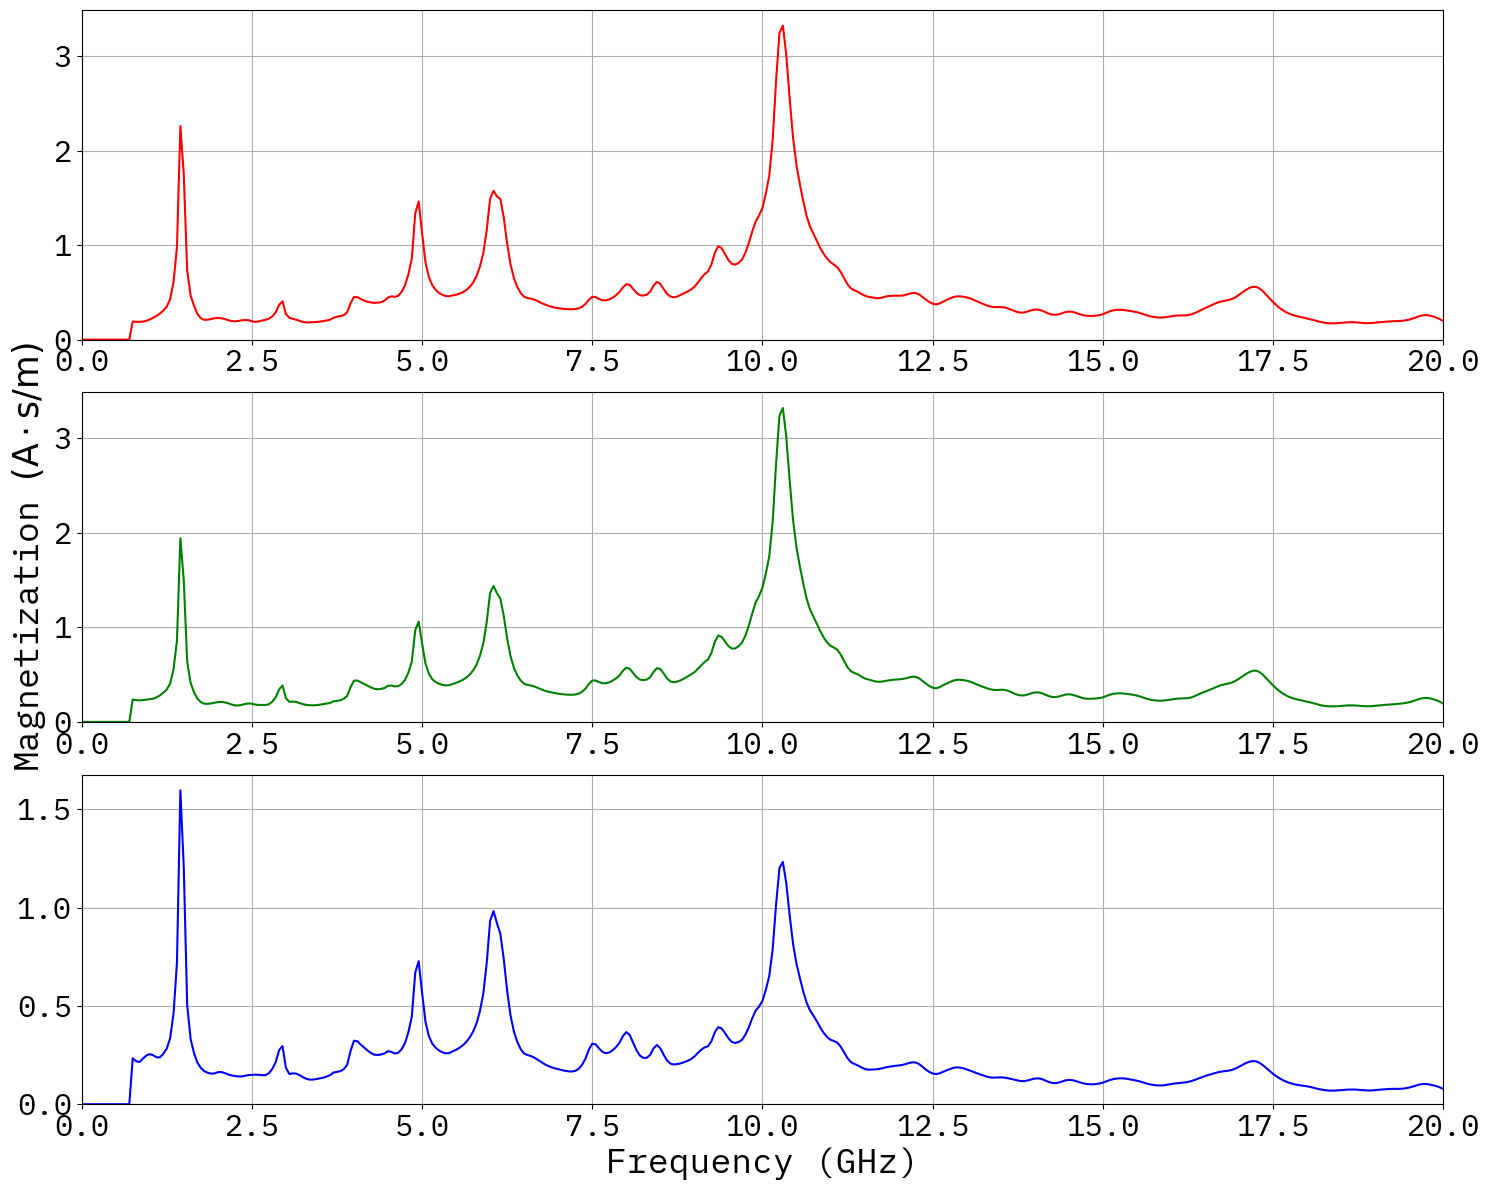

In [18]:
#%matplotlib qt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=graph_res)
#fig.suptitle(f"{f_name}, Full Magnetization FFT", fontsize=19)
#fig.suptitle(f_name + ", PSD", fontsize=16)


axes[0].plot(freq, psdx, color='red', label=r"$\tilde{m}_x$")
axes[1].plot(freq, psdy, color='green', label=r"$\tilde{m}_y$")
axes[2].plot(freq, psdz, color='blue', label=r"$\tilde{m}_z$")



for i in range(3):
    axes[i].grid(True) 
    axes[i].set_xlim(0, 20)
    axes[i].set_ylim(0)
        

"""if show_peaks:
    for i in range(0,3):
        axes[i].legend(loc="upper right")
        axes[i].grid(True)
        nd = datapsd[:, i]
        nd = nd[nd != 0]
        for j in nd:
            axes[i].text(freq[j], psds[i, j]*1.05 , str(freq[j] // 1e7 / 100) + "GHz, \ni = " + str(j))"""
        
        
axes[1].set_ylabel(r"Magnetization $(\text{A} \cdot \text{s}/\text{m})$")

axes[2].set_xlabel("Frequency (GHz)")

plt.tight_layout()

if save_figs:
    plt.savefig(folder_path + "/psd_fft_lin.png")
    plt.savefig("/home/balthasar/Sync/Master/Thesis/Master_Thesis_Latex/figures/fft_vector/" + f"{f_name}_magVfft_lin.png")

plt.show()
plt.close()


In [19]:
psdx, psdy, psdz, freq = np.loadtxt(folder_path+"/vFFT_sq.dat", unpack=True)

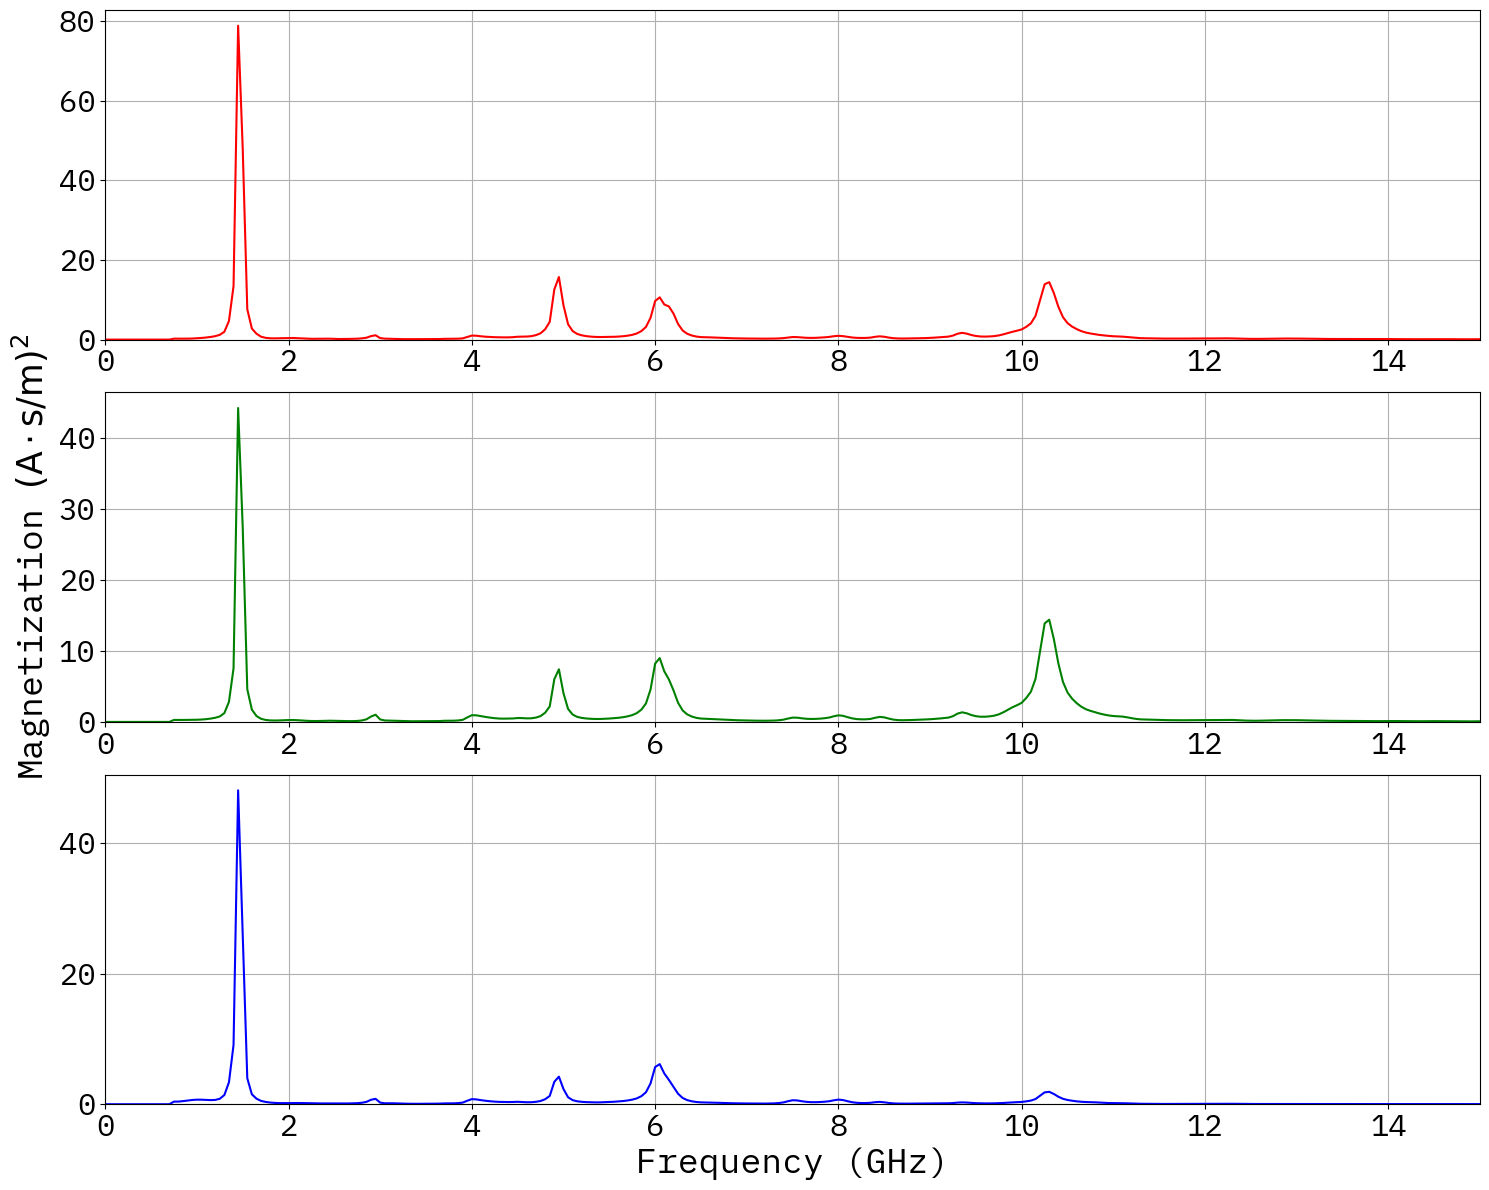

In [21]:
#%matplotlib qt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=graph_res)
#fig.suptitle(f"{f_name}, Full Magnetization FFT", fontsize=19)
#fig.suptitle(f_name + ", PSD", fontsize=16)


axes[0].plot(freq, psdx, color='red', label=r"$\tilde{m}_x$")
axes[1].plot(freq, psdy, color='green', label=r"$\tilde{m}_y$")
axes[2].plot(freq, psdz, color='blue', label=r"$\tilde{m}_z$")



for i in range(3):
    axes[i].grid(True) 
    axes[i].set_xlim(0, 15)
    axes[i].set_ylim(0)
        

"""if show_peaks:
    for i in range(0,3):
        axes[i].legend(loc="upper right")
        axes[i].grid(True)
        nd = datapsd[:, i]
        nd = nd[nd != 0]
        for j in nd:
            axes[i].text(freq[j], psds[i, j]*1.05 , str(freq[j] // 1e7 / 100) + "GHz, \ni = " + str(j))"""

        
axes[1].set_ylabel(r"Magnetization $(\text{A} \cdot \text{s}/\text{m})^2$")

axes[2].set_xlabel("Frequency (GHz)")

plt.tight_layout()

if save_figs:
    plt.savefig(folder_path + "/psd_fft_sq.png")
    plt.savefig("/home/balthasar/Sync/Master/Thesis/Master_Thesis_Latex/figures/fft_vector/" + f"{f_name}_magVfft_sq.png")

plt.show()
plt.close()


In [ ]:
points= [29, 121, 206]

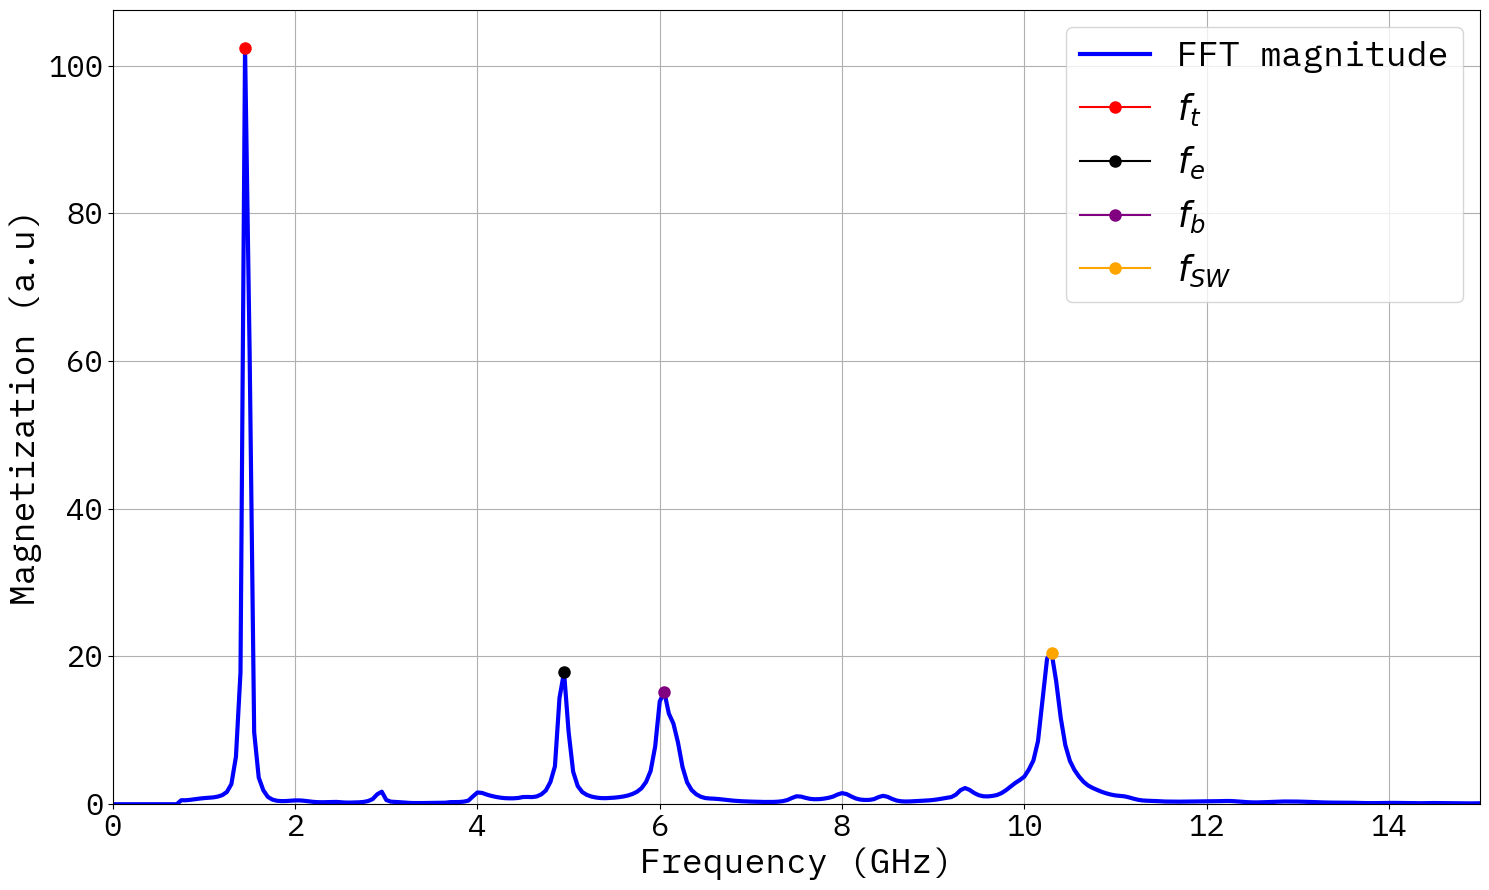

In [66]:
plt.figure(figsize=(15, 9))
mag = np.sqrt(psdx**2 + psdy**2 + psdz**2)
plt.plot(freq, mag , color='blue', label="FFT magnitude", linewidth=3)

#poi = [1.46, 5.0, 6.0, 7.5, 8, 10.3, 14.65]

#plt.axvline(1.46, zorder=-1, color="black", label="SOG, translational mode")
#plt.axvline(1.70,zorder=-1,  color="red", label="SF, measured")

plt.plot(freq[29], mag[29], color='red', marker='o', markersize=8, label=r"$f_t$")
plt.plot(freq[99], mag[99], color='black', marker='o', markersize=8, label=r"$f_e$")
plt.plot(freq[121], mag[121], color='purple', marker='o', markersize=8, label=r"$f_b$")
plt.plot(freq[206], mag[206], color='orange', marker='o', markersize=8, label=r"$f_{SW}$")


plt.ylabel(r"Magnetization (a.u)")
plt.xlabel("Frequency (GHz)")

plt.tight_layout()
plt.xlim(0, 15)
plt.ylim(0)

plt.grid(True)

plt.legend(loc="upper right")


plt.savefig("/home/balthasar/Desktop/test_plot.png")

plt.show()

In [46]:
np.where(freq == 1.45)

(array([29]),)

In [62]:
np.where(freq == 4.95)

(array([99]),)

In [47]:
np.where(freq == 6.05)

(array([121]),)

In [48]:
np.where(freq == 10.30)

(array([206]),)